# 作業目標:

    使用CIFAR100, 數據集變大的影響
    
    
# 作業重點:¶

   了解 CIFAR100 跟 CIFAR10 數據及差異


In [225]:
import numpy
from keras.datasets import cifar100
import numpy as np
np.random.seed(100)

# 資料準備

In [226]:
(x_img_train, y_label_train), \
(x_img_test, y_label_test) = cifar100.load_data()

In [227]:
print('train:', len(x_img_train))
print('test:', len(x_img_test))

train: 50000
test: 10000


In [228]:
# search for dimension imformation
x_img_train.shape

(50000, 32, 32, 3)

In [229]:
x_img_test.shape

(10000, 32, 32, 3)

In [230]:
y_label_train.shape

(50000, 1)

In [231]:
# Arrange the categories of object image datasets into a dictionary
label_dict={0:"000",1:"001",2:"002",3:"003",4:"004",5:"005",6:"006",7:"007",8:"008",9:"009",
           10:"010",11:"011",12:"012",13:"013",14:"014",15:"015",16:"016",17:"017",18:"018",19:"019",
           20:"020",21:"021",22:"022",23:"023",24:"024",25:"025",26:"026",27:"027",28:"028",29:"029",
           30:"030",31:"031",32:"032",33:"033",34:"034",35:"035",36:"036",37:"037",38:"038",39:"039",
           40:"040",41:"041",42:"042",43:"043",44:"044",45:"045",46:"046",47:"047",48:"048",49:"049",
           50:"050",51:"051",52:"052",53:"053",54:"054",55:"055",56:"056",57:"057",58:"058",59:"059",
           60:"060",61:"061",62:"062",63:"063",64:"064",65:"065",66:"066",67:"067",68:"068",69:"069",
           70:"070",71:"071",72:"072",73:"073",74:"074",75:"075",76:"076",77:"077",78:"078",79:"079",
           80:"080",81:"081",82:"082",83:"083",84:"084",85:"085",86:"086",87:"087",88:"088",89:"089",
           90:"090",91:"091",92:"092",93:"093",94:"094",95:"095",96:"096",97:"097",98:"098",99:"099",
           }

In [232]:
# import image print model
import matplotlib.pyplot as plt

# Announce a function of image labeling
def plot_images_labels_prediction(images, labels, prediction, idx, num = 100):
    fig = plt.gcf()
    fig.set_size_inches(20,20) # picture size
    if num > 100 : num = 100
    for i in range(0,num):
        ax = plt.subplot(20,5,1+i)
        ax.imshow(images[idx],cmap = 'binary')
        
        title=str(i)+','+label_dict[labels[i][0]]
        if len(prediction) > 0:
            title += '=>' +label_dict[prediction[i]]
            
        ax.set_title(title,fontsize = 10)
        ax.set_xticks([]);ax.set_yticks([])
        idx+=1
    plt.show()

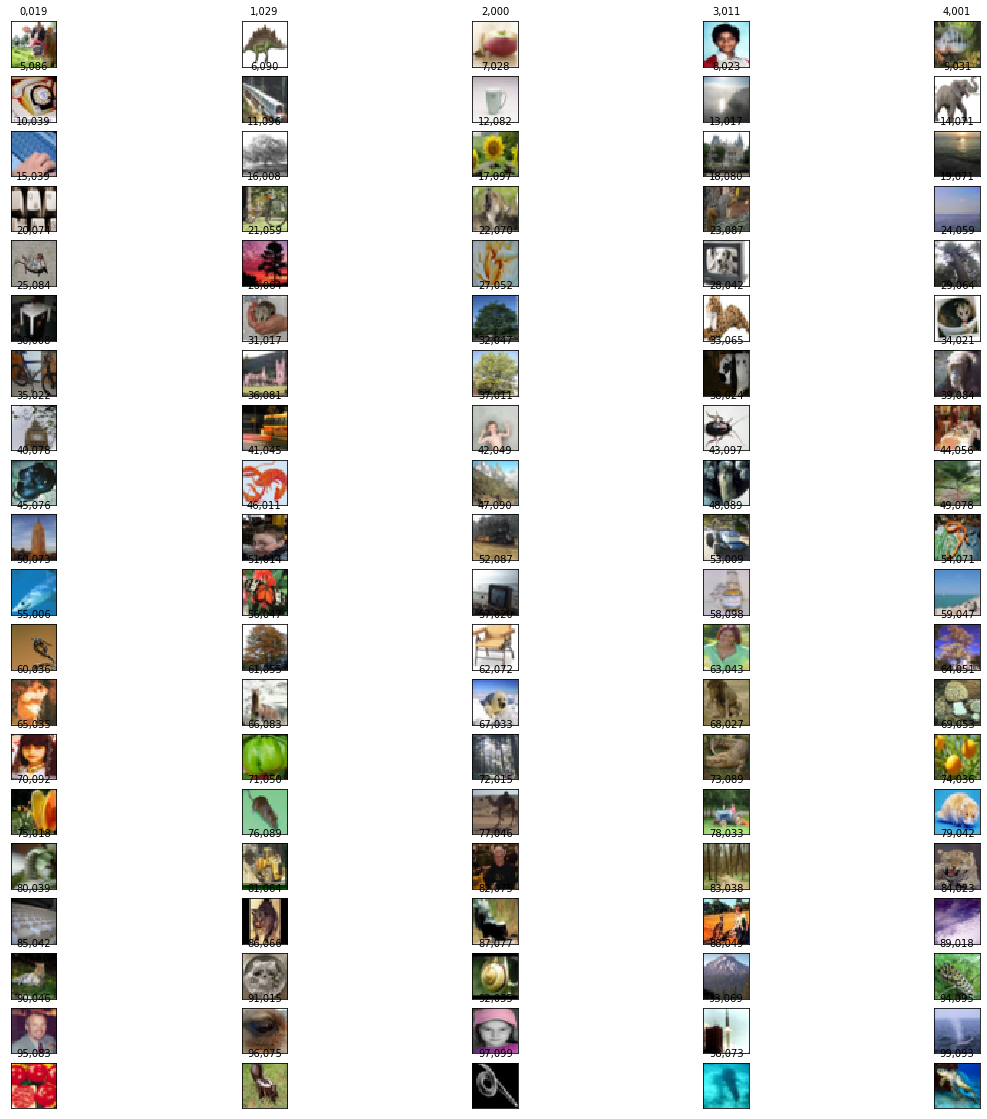

In [233]:
# Label different image
plot_images_labels_prediction(x_img_train, y_label_train, [], 0)

# Image normalize 

In [234]:
x_img_train[0][0][0]

array([255, 255, 255], dtype=uint8)

In [235]:
x_img_train_normalize = x_img_train.astype('float32') / 255
x_img_test_normalize = x_img_test.astype('float32') / 255

In [236]:
x_img_train_normalize[0][0][0]

array([1., 1., 1.], dtype=float32)

# 轉換label 為OneHot Encoding

In [237]:
y_label_train.shape

(50000, 1)

In [238]:
y_label_train[:5]

array([[19],
       [29],
       [ 0],
       [11],
       [ 1]])

In [239]:
from keras.utils import np_utils
y_label_train_OneHot = np_utils.to_categorical(y_label_train)
y_label_test_OneHot = np_utils.to_categorical(y_label_test)

In [240]:
y_label_train_OneHot.shape

(50000, 100)

In [241]:
y_label_train_OneHot[:5]

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0.